In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from itertools import combinations
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,accuracy_score

In [106]:
# i.

# Wczytanie pliku animals.csv do ramki danych
df = pd.read_csv('animals.csv')

In [107]:
# lista zwierząt
animals = df.pop('Unnamed: 0')

In [108]:
# Uzupełnienie wszystkich wartości NaN wartością 0
df.fillna(0,inplace=True)

In [109]:
# Nazwanie kolumn
columns = ("warm-blooded","can fly","vertebrate","endangered","live in groups","have hair")
df.columns = columns

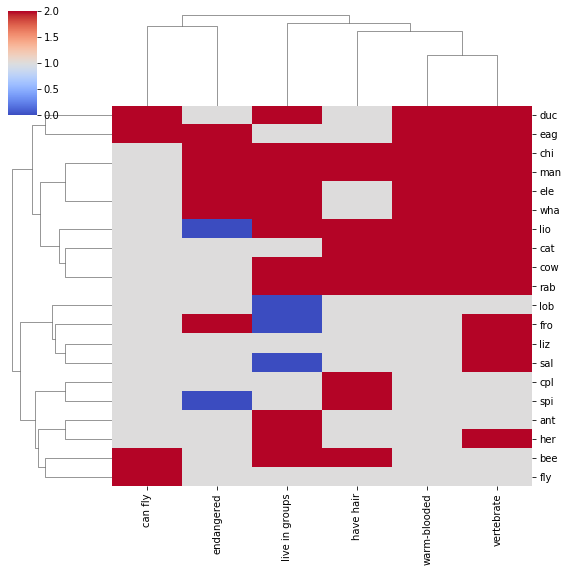

In [110]:
sns.clustermap(df,cmap="coolwarm",yticklabels=animals,figsize=(8,8),row_cluster=True)

#### Czerowony kolor oznacza, że dana obserwacja posiada daną cechę, a kolor szary oznacza jej brak. Widać, że klasteryzacja przebiegła poprawnie - przykładowo mucha z pszczołą zostały zgrupowane razem co wydaje się być poprawne.

In [111]:
# ii.
# Wczytanie zbioru iris
iris = pd.read_csv('iris.csv')

In [112]:
# lista wszystkich możliwych kombinacji [1,2,3,4] odpowiadająca numerom kolumn
combs = []
for i in range(3):
    combs.append(list(combinations([0,1,2,3], i+2)))

In [113]:
def converter(species):
    if species =='setosa':
        return 0
    elif species == 'versicolor':
        return 1
    elif species == 'virginica':
        return 2

In [114]:
iris['class'] = iris['species'].apply(converter)

iris

,sepal_length,sepal_width,petal_length,petal_width,species,class
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [131]:
# Skuteczność klasteryzacji dla każdej możliwej kombinacji zmiennych
acc = []
for i in combs:
    for j in range(len(i)):
        x = iris.iloc[:,list((i[j]))].values
        kmeans = KMeans(n_clusters=3)
        kmeans.fit(x)
        acc.append(accuracy_score(iris['class'],kmeans.labels_))

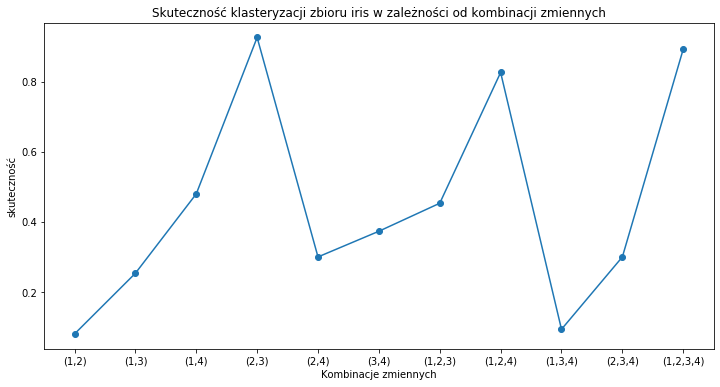

In [132]:
# Wykres skuteczności w zależności od kombinacji zmiennych

combs_lables = ['(1,2)','(1,3)','(1,4)','(2,3)','(2,4)','(3,4)','(1,2,3)','(1,2,4)','(1,3,4)','(2,3,4)','(1,2,3,4)']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel("Kombinacje zmiennych")
ax.set_ylabel("skuteczność")
ax.set_title("Skuteczność klasteryzacji zbioru iris w zależności od kombinacji zmiennych")
ax.plot(combs_lables, acc, marker='o')
plt.show()

#### Z powyższego wykresu widać, że skuteczność klasteryzacji w znaczny sposbób fluktuuje oraz niektóre kombinacje zmiennych sprawaiają, że dla algorytm k średnich nie jest w stanie poprawnie zgrupować obserwacji. W niektróych przypadkach widać, że skuteczność klasteryzacji jest < 20%. Może to wynikać, że z tego względu, że algorytm na samym już początku źle zgrupował najbliższe obserwacje co doprowadziło do powstania klastra złożonego z wielu obserwacji, które tak naprawdę powinny być przypisane do innego klastra.